# Plotting Oscillations

In class we covered three (well, four if you include undamped motion) cases of damped oscillations.  Let's plot them up!

## Weak Damping

First up is *underdamped* or *weak damping*,
$$
x(t) = A e^{-\beta t} \cos (\omega_1 t - \delta),
$$
where $A$ is the initial amplitude, $\beta$ is the damping parameter, and 
$$
\omega_1 = \sqrt{\omega_0^2 - \beta^2}.
$$

Let's try a plot where $A = 1$ m, the natural frequency is $\omega_0 = 2\pi$ rad/s, and $\beta = \omega_0/5$.  We'll stretch the spring and let it go from rest so that $\delta = 0$.

The faint grey line is the undamped motion for comparison.

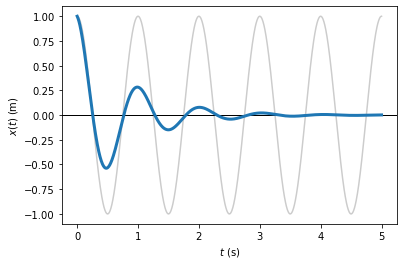

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# set parameters
A = 1
w0 = 2*np.pi
B = w0/5
d = 0

w1 = np.sqrt(w0**2 - B**2)

# create arrays of data
t = np.linspace(0, 5, 1000)
x = A * np.exp(-B*t) * np.cos(w1 * t - d)

# I'll plot the undamped motion too
x_sho = A * np.cos(w0 * t - d)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.axhline(0, color="black", lw=1)

ax.plot(t, x_sho, color="black", alpha=0.2)
ax.plot(t, x, lw = 3)

ax.set_xlabel("$t$ (s)")
ax.set_ylabel("$x(t)$ (m)")

plt.savefig("fig_weak.pdf")

## Strong Damping

Next is *overdamping* or *strong damping*.  In this case,
$$
x(t) = C_1 e^{-\beta_- t} + C_2 e^{-\beta_+},
$$
where 
$$
\beta_- = \beta - \sqrt{\beta^2 - \omega_0^2} 
$$
and
$$
\beta_- = \beta + \sqrt{\beta^2 - \omega_0^2}.
$$

This time we'll kick the cart at the end of the spring, giving it velocity $v_0$ but starting from $x=0$.  In that case the motion is (see notes for how to find $C_1$ and $C_2$)
$$
x(t) = \frac{v_0}{\sqrt{\beta^2 - \omega_0^2}} \left( e^{-\beta_- t} - e^{-\beta_+ t} \right).
$$

Let's take $v_0 = 1$ m/s, $\omega_0 = 2\pi$ rad/s, and $\beta = 2\omega_0 = 4\pi$ rad/s.

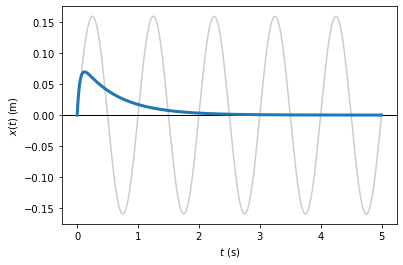

In [64]:
v0 = 1
w0 = 2*np.pi
B = 2 * w0

Bm = B - np.sqrt(B**2 - w0**2)
Bp = B + np.sqrt(B**2 - w0**2)

t = np.linspace(0, 5, 1000)
x = v0 / np.sqrt(B**2 - w0**2) * (np.exp(-Bm * t) - np.exp(-Bp * t))
x_sho = v0 / w0 * np.cos(w0 * t - np.pi/2)                          

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.axhline(0, color="black", lw=1)

ax.plot(t, x_sho, color="black", alpha=0.2)
ax.plot(t, x, lw = 3)

ax.set_xlabel("$t$ (s)")
ax.set_ylabel("$x(t)$ (m)")

plt.savefig("fig_strong.pdf")

## Critical Damping

Finally, the *critical damping* case.  Now 
$$
x(t) = C_1 e^{-\beta t} + C_2 t e^{-\beta t}.
$$

Let's once again stretch the spring and let it go from rest, in which case we can find $C_1$ and $C_2$ and write the position as
$$
x(t) = x_0 ( 1 + \beta t) e^{-\beta t}.
$$

We'll use $x_0 = 1$ m again, and I'll plot a few different values of $\beta$.

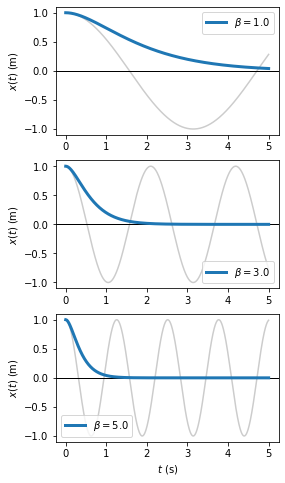

In [62]:
x0 = 1
betas = np.linspace(1, 5, 3)

t = np.linspace(0, 5, 1000)

fig = plt.figure(figsize=(4,8))
#plt.subplots_adjust(hspace=0.4)

i = 1
for B in betas:
    x = x0 * (1 + B*t) * np.exp(-B*t)
    x_sho = x0 * np.cos(B*t)
    
    ax = fig.add_subplot(3,1,i)
    ax.axhline(0, color="black", lw=1)
    ax.plot(t, x_sho, color="black", alpha=0.2)
    ax.plot(t, x, lw = 3, label=r"$\beta =$" + f"{B}")
    ax.set_ylabel("$x(t)$ (m)")
    ax.legend()
    i += 1

ax.set_xlabel("$t$ (s)")

plt.savefig("fig_critical.pdf", bbox_inches='tight')   
